***

# Functions  函数
Functions are helpful to define often use sections of code, and it makes the codes cleaner to read and easier to code.

**def** defines the name and the function

<span id="mulu"><font face="黑体" size=6>本章目录</font></span>
* [第四讲 函数](#2)

    * [4.1 最简单的函数](#4.1)
    * [4.2 带参数的函数](#4.2) 
    * [4.3 函数的返回值](#4.3) 
    * [4.4 函数注解](#4.4) 
    * [4.5 匿名函数](#4.5) 
    * [4.6 变量作用域](#4.6) 
    * [4.7 内嵌函数和闭包](#4.7) 
    * [4.8 递归函数](#4.8) 
    * [4.9 函数例子](#4.9) 


___

# <font size=6><span id="4.1"> 4.1 最简单的函数</span></font>

In [ ]:
def print_function():
    print("Print")

print_function()

## Documentation 文档说明
A literal string at the start of module, class or function that is not assigned to a variable is treated as documentation and is displayed as part of the built-in help() output for that object.

In [ ]:
def print_function():
    """
    This function prints something.
    Second line of help.
    """
    print("something")

help(print_function)

[返回目录](#mulu)

# <font size=6><span id="4.2"> 4.2 带参数的函数 Function with parameter</span></font>

In [ ]:
def print_function(str):
    print(str)

print_function("I want to print this.")

### 带默认参数的函数  Parameter with default values

In [3]:
def print_function(str="No string passed."):
    print(str)
    

print_function("I want to print this.")
print_function()

I want to print this.
No string passed.


In [4]:
def print_function(str1, str2):
    print(str1)
    print(str2)

print_function("Print first line.", "Print 2nd line.")

Print first line.
Print 2nd line.


## 关键字参数 Keyword arguments

In [ ]:
def print_function(str1, str2, str3="3rd line.", str4="4th Line."):
    print(str1)
    print(str2)
    print(str3)
    print(str4)

print_function("Print first line.", "Print 2nd line.", str4 = "Print 4th line.")

## 收集参数 Arbitrary argument list

### 这个函数机制的动机是，函数的作者，有时候也不知道有几个参数
#### 这种事情经常会发生

In [ ]:
def print_function(*strs):
    print(strs[0])
    print(strs[1])
    print(strs[2])

print_function("Print 1st line.", "Print 2nd line.", "Print 3rd line.")

In [ ]:
def test(*param):
    print("有%d个参数" % len(param))
    
    for i in range(len(param)):
        print('第',i,'个参数是：',param[i])

test('F','a','m','i','l','y')

In [ ]:
# 编一个程序

### 相当于把所有参数打包带走
### 有的时候，收集参数后面还有参数，这个时候就需要关键参数来指定

In [7]:
def test(*param, extra):
    print("有%d个参数" % len(param))
    
    for i in range(len(param)):
        print('第',i,'个参数是：',param[i])   
    
    #print(type(param[0]))
    
    print('特别参数extra=',extra)

In [9]:
test(1,2,3,4,5,8) 
#test(1,2,3,4,5,extra=8)

TypeError: test() missing 1 required keyword-only argument: 'extra'

### z这个特别的关键参数，建议做成 默认参数

In [5]:
def test(*param, extra=8):
    print("有%d个参数" % len(param))
    
    for i in range(len(param)):
        print('第',i,'个参数是：',param[i])   
    
    print('特别参数extra=',extra)

In [6]:
test(1,2,3,4,5,8) 

有6个参数
第 0 个参数是： 1
第 1 个参数是： 2
第 2 个参数是： 3
第 3 个参数是： 4
第 4 个参数是： 5
第 5 个参数是： 8
特别参数extra= 8


### (*) 即可是打包，又可以是解包
### 加入参数传入的是一个列表a  给到*param，那么使用的时候就会出乎意料，如

In [ ]:
a = [1,2,3,4,5,6,7]
test(a)
### 这里讲列表作为整个参数了

In [ ]:
test(*a,extra=10)
### 这里讲列表解包，作为参数了


## 收集关键字参数 Arbitrary keyword argument dictionary
### 用两个星号(**)将参数打包成字典的形式，这里给一个示例

In [ ]:
def print_function(**kwstrs):
    print(kwstrs.get('str1'))
    print(kwstrs.get('str2'))
    print(kwstrs.get('str3'))

print_function(str2="Print 2nd line.", str3="Print 3rd line.", str1="Print 1st line.")

[返回目录](#mulu)

# <font size=6><span id="4.3"> 4.3 函数的返回值 Function with parameter</span></font>

In [ ]:
def double(str):
    return(str*2)

retVal = double("Double this string. ")
retVal

### 返回多个返回值  Return multiple values
Python function returns multiple statements.  
This is also called unpacking

In [ ]:
def title_upper_case(str1, str2):
    ret_str1 = str1.title()
    ret_str2 = str2.upper()
    return ret_str1, ret_str2

retStr1, retStr2 = title_upper_case("hello", "world!")
print(retStr1 + ' ' + retStr2)

retStrs = title_upper_case("hello", "world!")
print(retStrs[0] + ' ' + retStrs[1])

### Multiple return statements

In [ ]:
def title_upper_case(title_str=None, upper_str=None):
    """    title_str:首字母大写
    upper_str:全部大写     """
    # Title case  如果有字符串
    if title_str is not None:
        titled_str = title_str.title()  #title()首字母大写
        if upper_str == None:   #如果后一个是空，直接退出函数
            return titled_str
    
    # Upper case
    uppered_str = upper_str.upper()
    
    if title_str is None:
        return uppered_str
    
    return titled_str, uppered_str

retStr1 = title_upper_case("title this")
retStr2 = title_upper_case(upper_str="upper this")
retStr3 = title_upper_case("title this", "upper this")
print(retStr1)
print(retStr2)
print(retStr3)

### Ignore return variable  忽略一些返回值

In [ ]:
filename = 'foobar.txt'
basename, __, ext = filename.rpartition('.') #第二个输出，不需要
print("basename: " + basename)
print("extension: " + ext)

#说明：rpartition() 方法类似于 partition() 方法，只是该方法是从目标字符串的末尾也就是右边开始搜索分割符。。
#    如果字符串包含指定的分隔符，则返回一个3元的元组，第一个为分隔符左边的子串，第二个为分隔符本身，第三个为分隔符右边的子串
# 返回一个3元的元组，第一个为分隔符左边的子串，第二个为分隔符本身，第三个为分隔符右边的子串。

In [ ]:
## 复数求模和角度
def amp_ang(real=10,imag=10):
    import math
    amp = math.sqrt(real**2+imag**2)
    ang = math.atan(real/imag)
    ang = math.degrees(ang)
    return(amp,ang)
    
amp,ang=amp_ang(3,4)
print(amp,ang)

In [ ]:
amp1,__=amp_ang(3,4)
amp1

In [ ]:
__,ang1=amp_ang(3,4)
ang1

[返回目录](#mulu)

# <font size=6><span id="4.4"> 4.4 函数注解 Function Annotations</span></font>
Annotations are stored in the \__annotations\__ attribute of the function as a dictionary.  
Parameter annotations are defined by a colon after the parameter name, followed by an expression evaluating to the value of the annotation.  
Return annotations are defined by a literal ->, followed by an expression, between the parameter list and the colon denoting the end of the def statement.

In [ ]:
def f(ham: str, eggs: str = 'eggs') -> str:
    print("Annotations:", f.__annotations__)
    return ham + ' and ' + eggs

In [ ]:
f('spam')

In [ ]:
f.__annotations__


In [ ]:
type(f.__annotations__)

In [ ]:
def sum(a, b: int, c: 'The default value is 5' = 5) -> float:
    return a + b + c

In [ ]:
sum(1, 2, 3)

In [ ]:
sum(1, 2)

In [ ]:
# 第一个参数 a 没有注释，
# 第二个参数 b 带有类型为 int 的注释，
# 第三个参数 c 带有一个帮助字符串注释并且拥有默认值，
# 返回值用类型 float 来注释。

In [ ]:
sum('I love ', 'Tongji', 'Univ.')

In [ ]:
# 显然，注释对函数的执行没有任何影响。在这两种情况下，sum() 都做了正确的事情，只不过注释被忽略了而已。

In [ ]:
type(sum.__annotations__)

In [ ]:
# 函数对象有一个名为 __annotations__ 的属性，它是一个映射（dict），用于将每个参数名（key）映射到其相关的注释（value）。

# 注意： 映射中有一个特殊的 key，叫做“return”，仅当为函数的返回值提供注释时，才会显示该 key。

In [ ]:
sum.__annotations__

[返回目录](#mulu)

# <font size=6><span id="4.6"> 4.6 变量作用域</span></font>
一个程序的所有的变量并不是在哪个位置都可以访问的。访问权限决定于这个变量是在哪里赋值的。

变量的作用域决定了在哪一部分程序你可以访问哪个特定的变量名称。两种最基本的变量作用域如下：  
* 全局变量  
* 局部变量  

## 全局变量和局部变量  
定义在函数内部的变量拥有一个局部作用域，定义在函数外的拥有全局作用域。  

局部变量只能在其被声明的函数内部访问，而全局变量可以在整个程序范围内访问。调用函数时，所有在函数内声明的变量名称都将被加入到作用域中。如下实例：

In [ ]:
total = 0; # 这是一个全局变量
# 可写函数说明
def sum( arg1, arg2 ):
   #返回2个参数的和."
   total = arg1 + arg2; # total在这里是局部变量.
   print("函数内是局部变量 : ", total)
   return total;

#调用sum函数
sum( 10, 20 );
print("函数外是全局变量 : ", total)

[返回目录](#mulu)

# <font size=6><span id="4.7"> 4.7 内嵌函数和闭包</span></font>

## global 关键字
### 全局变量想作用于函数内，需加 global
### 全局变量的作用域是整个模块，也就是代码段内的所有函数都可以访问到全局变量
### 注意：函数内部仅仅去访问就好，尽量不要去修改。
###            一旦修改，函数内部会创建一个名字一模一样的局部变量，这样会影响不到全局变量

In [ ]:
count = 5

def myFun():
#    global count
#    count = 10
    print(count)

print(count)
myFun()
print(count)


In [ ]:
globvar = 0
print(globvar)

def set_globvar_to_one():
    global globvar    # 使用 global 声明全局变量
    globvar = 1

def print_globvar():
    print(globvar)     # 没有使用 global

set_globvar_to_one()
print(globvar)        # 输出 1
print_globvar()       # 输出 1，函数内的 globvar 已经是全局变量

1、global---将变量定义为全局变量。可以通过定义为全局变量，实现在函数内部改变变量值。

2、一个global语句可以同时定义多个变量，如 global x, y, z。

## 内嵌函数
函数的定义可以嵌套，允许在函数内创建另外一个函数，这种函数叫内嵌函数或者内部函数

## 本部班级第3周讲到这里！！！！！！！！！！！！！！！！！！！！

In [ ]:
def fun1():
    print("fun1()正在被调用......")
    
    def fun2():
        print("fun2()正在被调用......")
    
    fun2()
    

In [ ]:
fun1()

In [ ]:
fun2()
# fun2()除了在函数fun1内部可以使用，除了fun1，外部试图调研，都会出错

## 闭包
闭包(closure)是函数式编程中一个重要的语法结构，函数式编程是一种编程范式。  
如果一个内部函数里，对外部作用域的变量进行应用，那么内部函数就被认为是闭包  
换言之：出现在嵌套函数中，指的是内层函数引用到了外层函数的自由变量，就行成了闭包


In [ ]:
# ????
def funX(x):
    def funY(y):
        return x*y
    
    return funY

In [ ]:
i=funX(8)
print(i)

In [ ]:
i(5)

### 也可以这么写

In [ ]:
funX(8)(5)

概念：如果一个内部函数（如funY()就是这个内部函数），对外部作用于（但不是全局作用域）的变量进行引用（x就是被引用的变量，x在外部作用域funX函数里面，但不在全局作用域里面），那么这个函数（funY）就是一个闭包  
说明：闭包的概念是由内部函数的概念而来，不能再外部函数以外的地方对内部函数进行调用，即：

In [ ]:
funY(5)

### 内部函数中，只能对外部函数的局部变量进行访问，但不能进行修改。

In [ ]:
def funX():
    x = 5
    def funY():
        x *= x
        return x
    return funY

In [ ]:
funX()()

In [ ]:
def funX():
    x = 5
    def funY():
        x = 5
        return x
    return funY
funX()()

In [ ]:
# why 又可以了呢？

### 报错原因：x是局部变量的时候，外部函数的x就会被屏蔽，所以 x *= x时候，右边找不到x来计算，所以报错
### 可以改进一下，用关键字nonlocal，方式与global一样

In [ ]:
def funX():
    x = 5
    def funY():
        nonlocal x
        x *= x
        return x
    return funY

In [ ]:
funX()()

## nonlocal , global 的比较

### 在Python中，当引用一个变量的时候，对这个变量的搜索是按找本地作用域(Local)、嵌套作用域(Enclosing function locals)、全局作用域(Global)、内置作用域(builtins模块)的顺序来进行的，即所谓的LEGB规则。    
### 然而当在一个函数内部为一个变量赋值时，并不是按照上面所说LEGB规则来首先找到变量，之后为该变量赋值。  
### 在Python中，在函数中为一个变量赋值时，有下面这样一条规则:
### “当在函数中给一个变量名赋值是(而不是在一个表达式中对其进行引用)，Python总是创建或改变本地作用域的变量名，除非它已经在那个函数中被声明为全局变量. ”

In [ ]:
x = 99
def func():
    x = 88
func()
print(x)     #输出99


In [ ]:
# 上面的程序在func函数中为x赋值为88,按照上述规则，因为func函数中并没有变量x，
# 因此Python会在func函数的本地作用域创建一个变量x，也就是说此x并非x = 99中的x，
# 这样也就能够理解为什么最后程序输出依然为99了。   
# 若想要在函数中修改全局变量x，而不是在函数中新建一个变量，此时便要用到关键字global了，示例如下:

In [ ]:
x = 99
def func()
    global x
    x = 88
func()
print(x)    #输出88


In [ ]:
# 上述程序中的global x语句告诉Python在func的本地作用域内，要使用全局作用域中的变量x，因此在下面的x = 88语句中，
# Python不会再在本地作用域中新建一个变量，而是直接引用全局作用域中的变量x，这样程序最后输出88也就不难理解了。   

# 关键子nonlocal的作用与关键字global类似，使用nonlocal关键字可以在一个嵌套的函数中修改嵌套作用域中的变量，示例如下


In [ ]:
def func():
    count = 1
    def foo():
        count = 12
    foo()
    print(count)
func()    #输出1


In [ ]:
# 上面的程序中，在嵌套的foo函数中，对变量count赋值，同样会创建一个新的变量，
# 而非使用count = 1语句中的count，
# 如果要修改嵌套作用域中的count，就要使用nonlocal关键字了:

In [ ]:
def func():
    count = 1
    def foo():
        nonlocal count
        count = 12
    foo()
    print(count)
func()     #输出12


In [ ]:
# 上面的程序中，在foo函数中使用了nonlocal关键字，就会告诉Python在foo函数中使用嵌套作用域中的变量count，
# 因此对变量count进行修改时，会直接影响到嵌套作用域中的count变量，程序最后也就输出12了. 

### 注意:使用global关键字修饰的变量之前可以并不存在，  
### 而使用nonlocal关键字修饰的变量在嵌套作用域中必须已经存在。

[返回目录](#mulu)

In [ ]:
# 实例1
# -----------------判断一个数是否是素数------------------

In [ ]:
import math

def sushu(a):
    i=1
    for i in range(2,a):  #how  to improve speed
        if a%i==0:
            print(i)
            break
    if i==a-1:
        print('素数')
    else:
        print('不是素数')
    # return;



In [ ]:

sushu(25)

In [ ]:
sushu(23)

In [ ]:
import math

def sushu1(a):
    i=1
    for i in range(2,int(a**0.5)+1):  #how  to improve speed
        if a%i==0:
            print(i)
            print('不是素数')
            break
    else:
        print('素数')


In [ ]:
sushu1(25)

In [ ]:
# sushu1 vs sushu2
bigsushu=104729   #37975227936943673922808872755445627854565536638199
import datetime
starttime = datetime.datetime.now()

sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)
sushu(bigsushu)


endtime = datetime.datetime.now()

print ((endtime - starttime))

In [ ]:
# sushu1 vs sushu2
bigsushu=104729   #37975227936943673922808872755445627854565536638199
import datetime
starttime = datetime.datetime.now()

sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)
sushu1(bigsushu)


endtime = datetime.datetime.now()

print ((endtime - starttime))

In [ ]:
## 编写函数，输出某两个数之间所有的素数
def sushu2(a,b):
    """输出a，b两个数之间的所有素数"""
    print("===test===")
    

## 我们常常会把某一个程序和以下代码放在一个py文件中
## 下面的代码是测试函数的代码，单独运行这个py文件会有输出
## 但别的文件如果import这个py文件，则不会运行main里面的代码
def main():
    print("======测试函数的调试代码=======")
    sushu2(1,2)
    sushu2(3,4)
    
if __name__ == '__main__':
    main()


In [ ]:
# 单独运行函数

sushu2(2,3)

In [ ]:
import math

def isprime(a):
    i=1
    for i in range(2,a):  #how  to improve speed
        if a%i==0:
            #print(i)
            #print('不是素数')
            return 0
            break
    else:
        #print('素数')
        return 1

def main():
    print("======测试函数的调试代码=======")
    a = eval(input('input a number: '))
    if isprime(a):
        print('素数')
    else:
        print('不是素数')
    
if __name__ == '__main__':
    main()

In [ ]:
import math

def isprime1(a):
    i=1
    for i in range(2,int(a**0.5)+1):  #how  to improve speed
        if a%i==0:
            #print(i)
            #print('不是素数')
            return 0
            break
    else:
        #print('素数')
        return 1

def main():
    print("======测试函数的调试代码=======")
    a = eval(input('input a number: '))
    if isprime1(a):
        print('素数')
    else:
        print('不是素数')
    
if __name__ == '__main__':
    main()

In [ ]:
def isprimerange(a:int = 2, b:int = 10000, step:int = 1):
    """输出a，b两个数之间的所有素数"""

    import datetime
    starttime = datetime.datetime.now()

    print('\n在数字{0}和数字{1}，步长{2}的所有数字中，共有素数列表如下：\n'.format(a, b, step),end = ' ')
    count = 0
    for i in range(a,b,step):
        if isprime(i):   # 换成isprime1试试看
            count += 1
            print('{0:5d}'.format(i),end = ' ')
            if count % 10 == 0:
                print('\n',end = ' ')
    print('\n总共有素数{0}个'.format(count))
    
    endtime = datetime.datetime.now()

    print ('总共用时{0}秒'.format(endtime - starttime))

def main():
    print("======测试函数的调试代码=======")
    isprimerange(5, 10000, 2)
    
if __name__ == '__main__':
    main()

In [ ]:
## 计算字符串中大小写个数，等。

def deal_char(li):
    """
    
    """
    list=[]

    # list.append(float(max(li)))
    # list.append(float(min(li)))
    upper=0
    lower=0
    num=0
    other=0
    # str.__len__()
    for i in  range(len(li)):
        if li[i].isupper():
            upper+=1
        elif li[i].islower():
            lower+=1
        elif li[i].isnumeric():
            num+=1
        else:
            other+=1
    list.append(upper)
    list.append(lower)
    list.append(num)
    list.append(other)

    print("list:",list)
    return tuple(list)


ll=input("please input some char(or a string):",)
deal=deal_char(ll)
print("tuple contain count with upper char,lower char ,number and others:",deal)

In [ ]:
# 判断一个数，是不是回文数，如
# 12321  
def huiwen(n):
    n0 = n
    m = 0
    while(n):
        m = m * 10 + n % 10
        n = n // 10
    else:
        print(m)
    if(m==n):
        print("{0}是一个回文数".format(n0))
    else:
        print("{0}不是一个回文数".format(n0))

huiwen(2)

In [ ]:
# 参数会不会在函数里面被改动
def aaa(n):
    n = 3
    #return n

b = 5
aaa(b)
b

# 将n改成b试试


In [ ]:
# 参数会不会在函数里面被改动
def aaa(n):
    n[2] = 0
    #return n

b = [5, 4, 3, 2, 1]
aaa(b)
b

In [ ]:
## 练习，试编写一个函数，判断3个参数作为长度是否构成一个三角形
## 四平班级已经完成过
def triangle(a,b,c):
    ## 请编写代码，如可以输出“可以构成三角形”
    ## 否则输出“不可以构成三角形”
    pass
    
    
a = 3
b = 4
c = 5
triangle(a,b,c)

# <font size=6><span id="4.5"> 4.5 匿名函数（lambda表达式） </span></font>

python 使用 lambda 来创建匿名函数。  
lambda只是一个表达式，函数体比def简单很多。    
lambda的主体是一个表达式，而不是一个代码块。仅仅能在lambda表达式中封装有限的逻辑进去。  
lambda函数拥有自己的命名空间，且不能访问自有参数列表之外或全局命名空间里的参数。   
虽然lambda函数看起来只能写一行，却不等同于C或C++的内联函数，后者的目的是调用小函数时不占用栈内存从而增加运行效率。 

### 语法  
lambda函数的语法只包含一个语句，如下：

lambda [arg1 [,arg2,.....argn]]:expression

In [ ]:
# 可写函数说明
sum = lambda arg1, arg2: arg1 + arg2

# 调用sum函数
print("相加后的值为 : ", sum( 10, 20 ))
print("相加后的值为 : ", sum( 20, 20 ))

lambda表达式的作用
* lambda函数可以省下定义函数的过程  
* 有时候只需要调用一两次的函数，起名字头疼
* 简化代码的可读性

## 两个特殊的内置函数filter() 和 map()

# 1. filter()
### 过滤器：保留关注的信息，不感兴趣的去掉，看看filter()的注释

In [ ]:
help(filter)

### filter()有两个参数
### * 第一个参数，可以是None 
### * 如果是一个函数的话，则将第二个可迭代数据的每一个元素作为函数的参数进行计算，并把返回值True值筛选出来。    
### * 如果第一个是None，则将第二个参数中True的值筛选出来。 
<img src = "images\chapter04\input_figure.png">


In [ ]:
temp = filter(None,[1, 0, False, True])
list(temp)

In [ ]:
### 设计一个筛选奇数的过滤器
def odd(x):
    return x%2

temp = filter(odd,range(0,10))
list(temp)

In [ ]:
# 刚刚有一个素数程序，我们试试看
temp = filter(isprime, range(3,100))


In [ ]:
list(temp)

In [ ]:
#如果利用lambda函数
list(filter(lambda x:x%2, range(10)))

In [ ]:
list1 = [3,5,-4,-1,0,-2,-6]
sorted(list1, key=lambda x: abs(x))
#猜一下，这个语句什么意思

In [ ]:
str = ['a', 'b','c', 'd']

def fun1(s): return s if s != 'a' else None

ret = filter(fun1, str)

print( list(ret))

In [30]:
# 猜猜此句什么功能
print("".join(filter(lambda x: x not in 'abmn','I am a good boy, I love China!')))

I   good oy, I love Chi!


In [29]:
# 猜猜此句什么功能
str1 = 'I am a good boy, I love China!'
ret = filter(lambda x: x not in 'abmn', str1)
print("".join(ret))

I   good oy, I love Chi!


## map()函数

### 映射，两个参数，一个是函数，另一个是可迭代序列
### 将每一个元素作为函数的参数进行计算，并且返回加工之后的新序列
<img src = "images\chapter04\map_figure.png">

In [31]:
list(map(lambda x:x**2,range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [55]:
str = ['a', 'b', 'c', 'd'] 

ret = map(lambda s: s + ".txt", str)

#print(list(ret)) ?

for i in ret:
    print(i)

a.txt
b.txt
c.txt
d.txt


In [67]:
li = [11, 22, 33]
sl = [1, 2, 3]
new_list = map(lambda a, b: a + b, li, sl)
#print(type(new_list))
for each in list(zip(new_list,li,sl)):
    print(each)

(12, 11, 1)
(24, 22, 2)
(36, 33, 3)


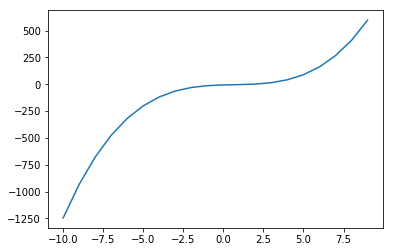

In [89]:
# 画出一个曲线

import matplotlib.pyplot as plt

x_axix = list(range(-10, 10, 1))

sub_axix = map(lambda x:x**3-2*x**2+4*x-6, x_axix)
sub_axix = list(sub_axix)

#print(x_axix)
#开始画图
plt.plot(x_axix, sub_axix)
plt.show()



## reduce()函数
## reduce用法：先把sequence中第一个值和第二个值当参数传给function，再把function的返回值和第三个值当参数传给fuction,最终返回一个结果值
## 接收的入参个数只能为2
<img src = "images\chapter04\reduce_figure.png">

In [97]:
from functools import reduce  #在python3之前，reduce是自带的函数；3之后，就需要import了
reduce(lambda x,y:x*y-4,range(4))

-40

<img src="images\chapter04\reduce02.jpg">

In [99]:
0 * 1-4


-4

In [100]:
-4 * 2 -4

-12

In [101]:
-12 * 3 -4

-40

In [103]:
reduce(lambda x, y: x * 10 + y, [1, 2, 3, 4, 5])
# 这句话啥意思呢？

12345

In [108]:
from functools import reduce
scientists =({'name':'Alan Turing', 'age':55, 'gender':'male'},
    {'name':'Dennis Ritchie', 'age':76, 'gender':'male'},
    {'name':'Ada Lovelace', 'age':22, 'gender':'female'},
    {'name':'Frances E. Allen', 'age':44, 'gender':'female'})
def reducer(accumulator , value):
    sum = accumulator + value['age']
    return sum
total_age = reduce(reducer, scientists, 0)
print(total_age/len(scientists))

49.25


[返回目录](#mulu)

# <font size=6><span id="4.8"> 4.8 递归函数</span></font>

## 什么是递归？

### 函数直接或者间接的调用自己

In [ ]:
time = 0
def recursion():
    global time
    time += 1
    print(time)
    recursion()
#这是最简单的例子，一个无线调用自己的函数，会死机的

In [ ]:
recursion()
# 死机了吗？
# 网络爬虫，有时候会爬很深，所以要设置一个最大的深度限制


In [ ]:
import sys
sys.setrecursionlimit(500) #比如设置500层
recursion()

In [ ]:
## 求阶乘的递归程序

In [ ]:
def jiecheng(n):
    result = n
    for i in range(1,n):
        result *= i
    return result

number = int(input('请输入一个整数：'))
result = jiecheng(number)
print("%d的阶乘是:%d" %(number,result))

In [ ]:
## 求阶乘的递归程序(递归版本)

In [ ]:
def jiecheng(n):
    if n == 1:
        return 1
    else:
        return n*jiecheng(n-1)

number = int(input('请输入一个整数：'))
result = jiecheng(number)
print("%d的阶乘是:%d" %(number,result))

<img src="images/chapter03/jiecheng01.jpg">

<img src="images/chapter03/jiecheng02.jpg">

### 斐波那契数列

$ 
F(n)=\left\{\begin{matrix}
1& when&  n=1\\ 
1 & when&  n=2\\ 
F(n-1)+F(n-2) &when&  n>2 
\end{matrix}\right.
$

<img src="images/chapter03/rabbit.jpg">

In [ ]:
## 迭代实现
def fab(n):
    a1 = 1
    a2 = 1
    a3 = 1
    if n<1 :
        print("input error")
        return -1
    while (n-2)>0:
        a3=a1+a2
        a1=a2
        a2=a3
        n -= 1
    return a3

result = fab(20)
if result != -1:
    print('Total result= ',result)

<img src="images/chapter03/rabbit2.jpg">

In [ ]:
# 递归实现
def fab(n):
    if (n<1):
        print('input error')
        return -1
    if n == 1 or n == 2:
        return 1
    else:
        return fab(n-1)+fab(n-2)

result = fab(20)
if result != -1:
    print('Total result= ',result)

### 汉诺塔

<img src="images/chapter03/hannuota.gif">
# <font size=12> X            Y        Z</font>

<img src="images/chapter03/hanoi.jpg">

In [109]:
def hanoi(n,x,y,z):
    if n == 1:
        print(x,'--->',z) #如果只有一层，直接从X移到
    else:
        hanoi(n-1,x,z,y) #将前n-1个盘子从X移到Y上去
        print(x,'--->',z) #将最底下的盘子，从X移动到Z上去
        hanoi(n-1,y,x,z) #将Y上的移动到Z上
        

In [110]:
n = int(input('请输入汉诺塔层数：'))
hanoi(n,'X','Y','Z')

请输入汉诺塔层数：5
X ---> Z
X ---> Y
Z ---> Y
X ---> Z
Y ---> X
Y ---> Z
X ---> Z
X ---> Y
Z ---> Y
Z ---> X
Y ---> X
Z ---> Y
X ---> Z
X ---> Y
Z ---> Y
X ---> Z
Y ---> X
Y ---> Z
X ---> Z
Y ---> X
Z ---> Y
Z ---> X
Y ---> X
Y ---> Z
X ---> Z
X ---> Y
Z ---> Y
X ---> Z
Y ---> X
Y ---> Z
X ---> Z


### 递归的一些用处

<img src="images/chapter03/digui01.png">

<img src="images/chapter03/digui02.png">

<img src="images/chapter03/digui03.png">

In [ ]:
import turtle
def main():
    t = turtle.Turtle()
    t.hideturtle()
    t.speed(10)
    level = 3
    fract(t,-80,60,80,60,level)
def fract(t,x1,y1,x2,y2,level):
    newX = 0
    newY = 0
    if level == 0:
        drawLine(t,x1,y1,x2,y2)
    else:
        newX = (x1+x2)/2 + (y2-y1)/2
        newY = (y1+y2)/2 - (x2-x1)/2
        fract(t,x1,y1,newX,newY,level-1)
        fract(t,newX,newY,x2,y2,level-1)
def drawLine(t,x1,y1,x2,y2):
    t.up()
    t.goto(x1,y1)
    t.down()
    t.goto(x2,y2)
main()

# IDLE运行

<img src="images/chapter03/fenxing.png">

[返回目录](#mulu)

# <font size=6><span id="4.9"> 4.9 函数案例</span></font>

In [ ]:
# 列表反转
def reverse(li):
    for i in range(0, int(len(li) / 2)):
        temp = li[i]
        li[i] = li[-i-1]
        li[-i-1] = temp

l = [1, 2, 3, 4, 5]
reverse(l)
print(l)

## 求函数的根

In [1]:
import math
f=lambda x : 2*x**3+3*x**2+1*x+1

def root(x1 , x2, EPS=1e-12):
    xm=x1/2+x2/2
    #count = 0
    while math.fabs(f(xm)) > EPS:
        xm=x1/2+x2/2
        if(f(xm)*f(x1) > 0): x1=xm
        if(f(xm)*f(x2) > 0): x2=xm
        #count=count+1
        #print(count,"   ",x1,"   ",x2)
    else:
        return xm
    
root(-2, 5)

-1.3981609516295066

[返回目录](#mulu)

# Built-in functions
List of built-in functions:

    abs()    dict()    help()    min()    setattr()  
    all()    dir()    hex()    next()    slice()  
    any()    divmod()    id()    object()    sorted()  
    ascii()    enumerate()    input()    oct()    staticmethod()  
    bin()    eval()    int()    open()    str()  
    bool()    exec()    isinstance()    ord()    sum()  
    bytearray()    filter()    issubclass()    pow()    super()  
    bytes()    float()    iter()    print()    tuple()  
    callable()    format()    len()    property()    type()  
    chr()    frozenset()    list()    range()    vars()  
    classmethod()    getattr()    locals()    repr()    zip()  
    compile()    globals()    map()    reversed()    \__import\__()  
    complex()    hasattr()    max()    round()   
    delattr()    hash()    memoryview()    set()  

#### References:
https://www.learnpython.org/en/Functions  
http://docs.python-guide.org/en/latest/writing/style/  
https://docs.python.org/3/library/functions.html#built-in-funcs  

# =====================END===========================

[返回目录](#mulu)